# Preprocessing atlas: Smajic

<div class="alert alert-warning">

**What this notebook does**

In this notebook, the count table of the Human atlas of Smajic et al. will be loaded into scanpy and be annotated for future processing, integration and downstream analysis.
</div>  



### Loading libraries
Using sc2_seurat environment, importing packages and setting parameters.

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import matplotlib.pyplot as plt
import h5py
import scipy
import GEOparse

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

### h5 files

In [3]:
path='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/smajic_2021/ref109_v6.1'

SRR12621867=f'{path}/SRR12621867/outs/SRR12621867_cellbender_filtered.h5'
SRR12621868=f'{path}/SRR12621868/outs/SRR12621868_cellbender_filtered.h5'
SRR12621869=f'{path}/SRR12621869/outs/SRR12621869_cellbender_filtered.h5'
SRR12621870=f'{path}/SRR12621870/outs/SRR12621870_cellbender_filtered.h5'
SRR12621871=f'{path}/SRR12621871/outs/SRR12621871_cellbender_filtered.h5'
SRR12621872=f'{path}/SRR12621872/outs/SRR12621872_cellbender_filtered.h5'

In [4]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing')

In [5]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/1_preprocessing'

In [6]:
a = "SRR12621867,SRR12621868,SRR12621869,SRR12621870,SRR12621871,SRR12621872"
print(a.split(','))

['SRR12621867', 'SRR12621868', 'SRR12621869', 'SRR12621870', 'SRR12621871', 'SRR12621872']


## Load data

In [7]:
files = [SRR12621867,SRR12621868,SRR12621869,SRR12621870,SRR12621871,SRR12621872]
names = ['SRR12621867', 'SRR12621868', 'SRR12621869', 'SRR12621870', 'SRR12621871', 'SRR12621872']

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_SRR12621867 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_SRR12621868 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_SRR12621869 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_SRR12621870 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_SRR12621871 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


adata_SRR12621872 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


## Basic Preprocessing
### Doublet detection using scrublet
Doublets are droplets that captures two cells, which will lead to inconsistencies. So we need to detect and remove them. First we will annotate the objects with metadata.

https://github.com/swolock/scrublet
https://www.sciencedirect.com/science/article/pii/S2405471218304745

Following the advice of Chromium (below). The expected cells are: \
[5773, 5505, 2839, 5492, 3534, 7158] \
and expected doublet rates: \
[0.0444, 0.0425, 0.0219, 0.0424, 0.0273, 0.0551] \
for: \
['SRR12621867', 'SRR12621868', 'SRR12621869','SRR12621870', 'SRR12621871', 'SRR12621872']

> https://uofuhealth.utah.edu/huntsman/shared-resources/gba/htg/single-cell/genomics-10x.php

\
First check the recommended threshold by scrublet (minimum mode of real and simulate data). With good bimodel distribution it should be fine otherwise set a threshold manually.


In [8]:
names

['SRR12621867',
 'SRR12621868',
 'SRR12621869',
 'SRR12621870',
 'SRR12621871',
 'SRR12621872']

In [9]:
numberobj

6

In [11]:
#manually adding metadata due to lack of metadata file
for i in range(numberobj):
    locals()[object_names[i]].obs['species'] = ['Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien'][i]
    locals()[object_names[i]].obs['gender'] = ['female','male','male','male','male','male'][i]
    locals()[object_names[i]].obs['age'] = [93,66,77,84,88,90][i]
    locals()[object_names[i]].obs['instrument'] = ['Illumina NovaSeq 6000','Illumina NovaSeq 6000','Illumina NovaSeq 6000','Illumina NovaSeq 6000','Illumina NovaSeq 6000','Illumina NovaSeq 6000'][i]
    locals()[object_names[i]].obs['technology'] = ['10x_v3','10x_v3','10x_v3','10x_v3','10x_v3','10x_v3'][i]
    locals()[object_names[i]].obs['atlas'] = ['smajic','smajic','smajic','smajic','smajic','smajic'][i]
    locals()[object_names[i]].obs['sample'] = ['GSM4774936','GSM4774937','GSM4774938','GSM4774939','GSM4774940','GSM4774931'][i]
    
    
#viewing object annotations
for i in range(numberobj):
    print(locals()[object_names[i]].shape)
    

thr = None
expected_doublet_rates = [0.0444, 0.0425, 0.0219, 0.0424, 0.0273, 0.0551]
for i in range(numberobj):
    #predicts doublets and adds a score to objects
    sc.external.pp.scrublet(locals()[object_names[i]], expected_doublet_rate=expected_doublet_rates[i], stdev_doublet_rate=0.02, 
                            synthetic_doublet_umi_subsampling=1.0, knn_dist_metric='euclidean', normalize_variance=True, 
                            log_transform=False, mean_center=True, n_prin_comps=30, use_approx_neighbors=True, 
                            get_doublet_neighbor_parents=False, n_neighbors=None, threshold=thr, verbose=True, copy=False, random_state=0)
    #plot histogram of doublet scores(doesnt work in loop)
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),
                                               show=True,return_fig=True)


(8205, 60656)
(6699, 60656)
(3593, 60656)
(6032, 60656)
(5904, 60656)
(7762, 60656)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 4.4%
	Estimated  = 0.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 32.0%
Overall doublet rate:
	Expected   = 4.2%
	Estimated  = 6.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.9%
Overall doublet rate:
	Expected   = 2.2%
	Estimated  = 7.2%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 4.0%
Overall doublet rate:
	Expected   = 4.2%
	Estimated  = 6.2%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.0%
Overall doublet rate:
	Expected   = 2.7%
	Estimated  = 0.6%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 35.2%
Overall doublet rate:
	Expected   = 5.5%
	Estimated  = 8.2%


Check how many cells are higher than the threshold

In [14]:
for i in range(numberobj):
    print(names[i],'\n',locals()[object_names[i]].obs['predicted_doublet'].value_counts(),'\n')

SRR12621867 
 False    8197
Name: predicted_doublet, dtype: int64 

SRR12621868 
 False    6553
True      138
Name: predicted_doublet, dtype: int64 

SRR12621869 
 False    3578
True       10
Name: predicted_doublet, dtype: int64 

SRR12621870 
 False    6010
True       15
Name: predicted_doublet, dtype: int64 

SRR12621871 
 False    5898
True        1
Name: predicted_doublet, dtype: int64 

SRR12621872 
 False    7529
True      223
Name: predicted_doublet, dtype: int64 



### Scrublet simulation plot

SRR12621867


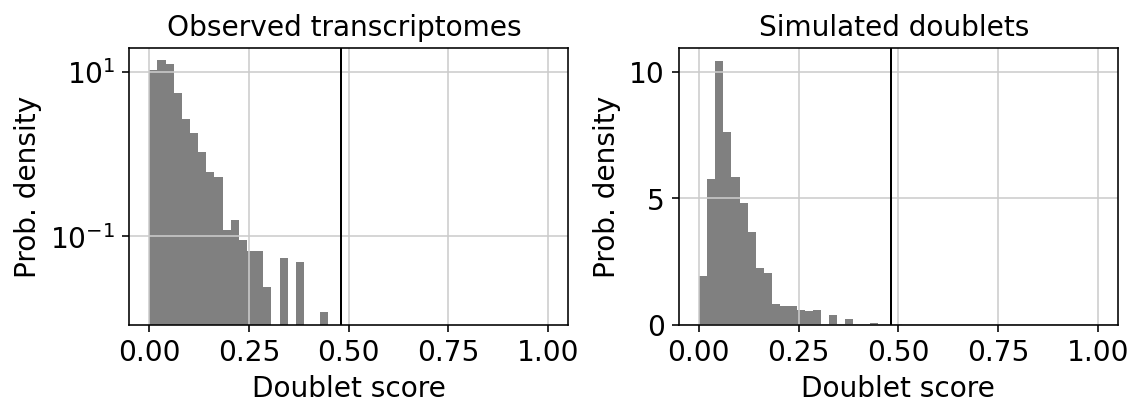

SRR12621868


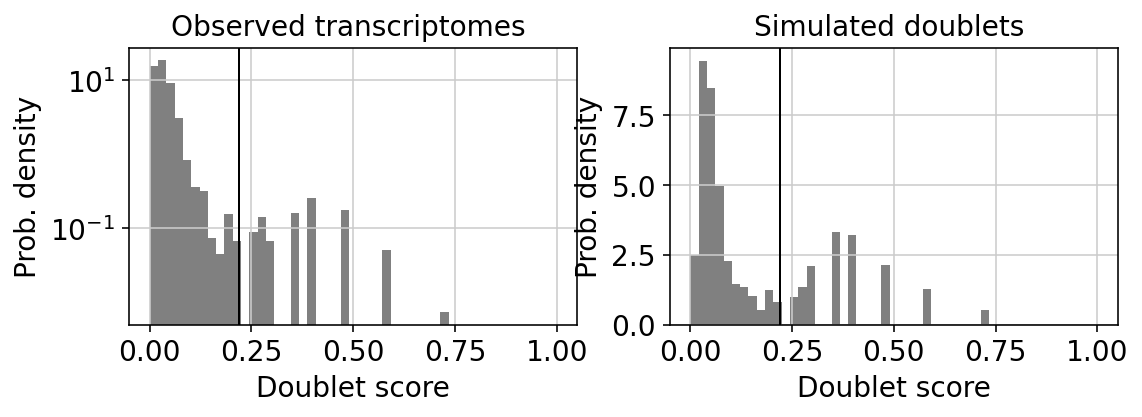

SRR12621869


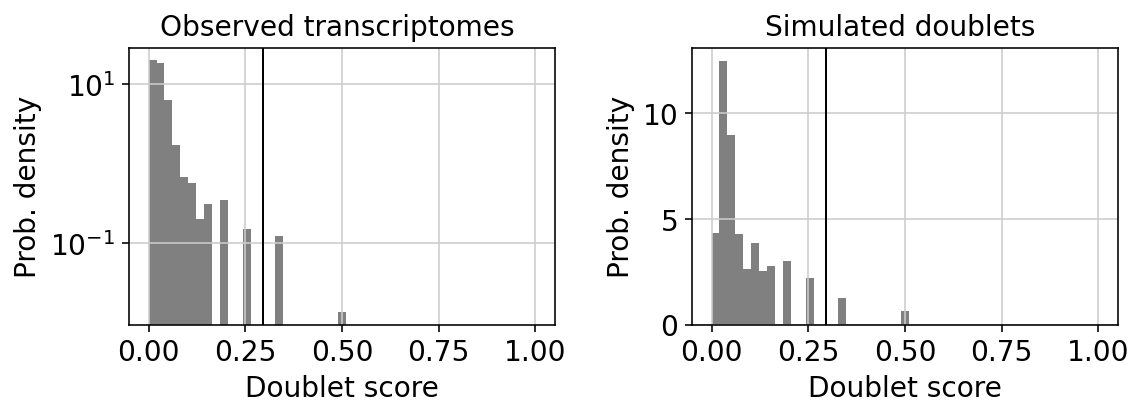

SRR12621870


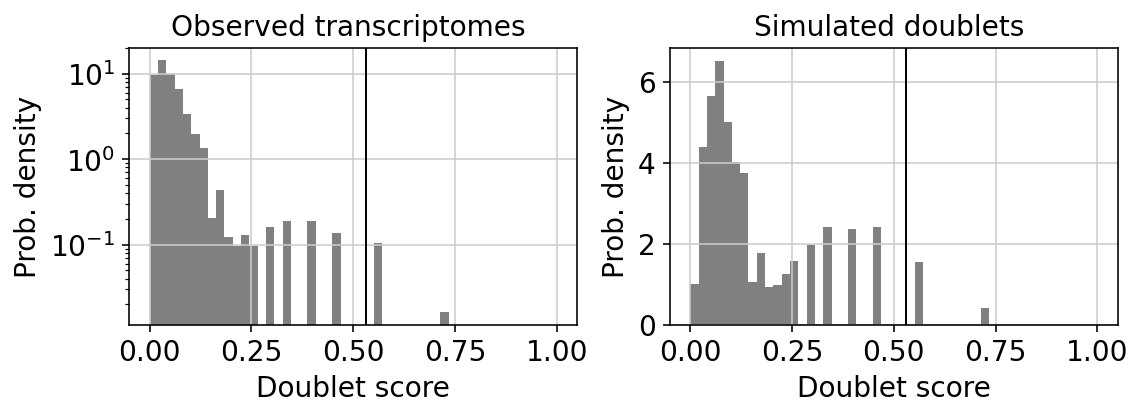

SRR12621871


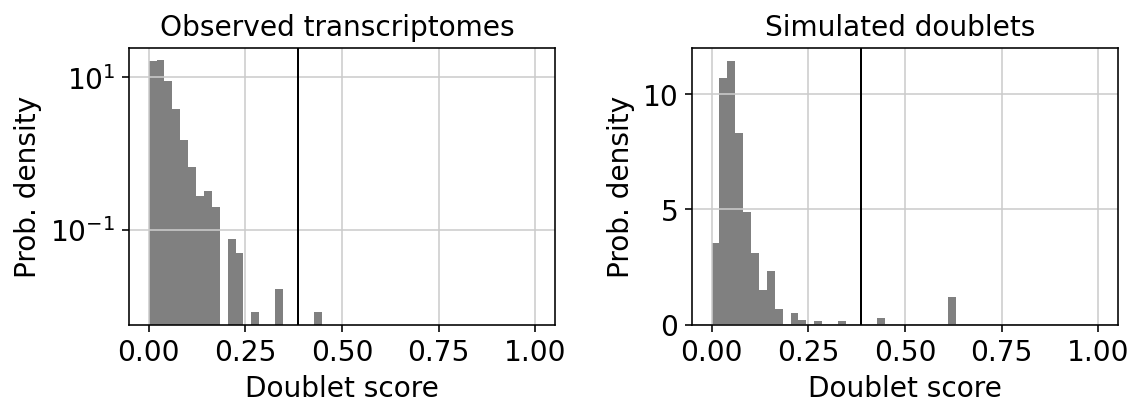

SRR12621872


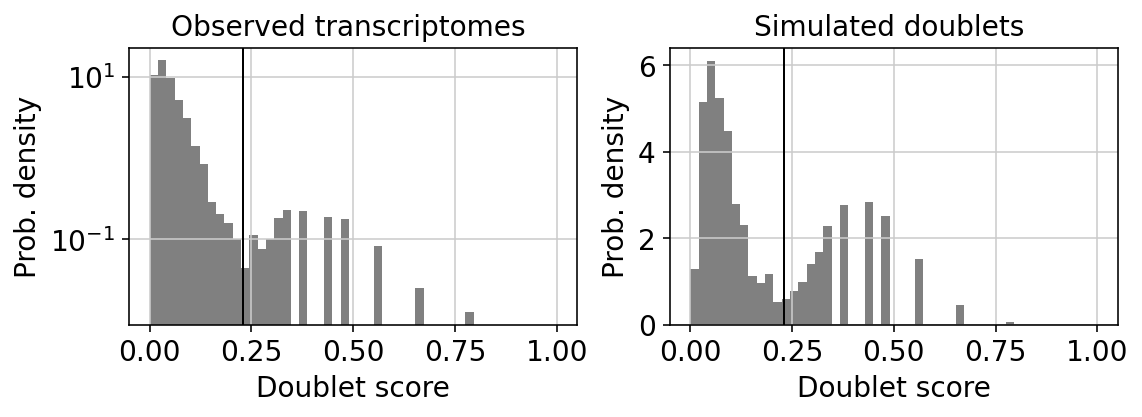

In [13]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),show=True,return_fig=True)

!!SRR12621867,SRR12621869, SRR12621870 and SRR12621871 do not seem to have a clearly defined bimodal distribution, which might require a manual threshold.

### Add QC and get rid of mitochondrial genes

<b> check this: sc.pp.calculate_qc_metrics() </b> <br>
expr_type: kind of values in X (str)<br>
var_type: kind of variables (str)<br>
qc_vars: keys for variables you want to control (collection of str)<br>
percent_top: proportions of top genes to cover, for cummulative proportion of counts (collection of int)<br>
layer: alternative layers for expression data (str)<br>
use_raw: use adata.raw.X for expression values (bool)<br>
inplace: place metrics in adata (bool)<br>
log1p: compute log1p transformed annotations, for very small values (bool)<br>
<br>
<b> return features obs </b> <br>
n_genes_by_counts: The number of genes with at least 1 count in a cell. <br>
total_counts: Total number of counts for a cell. <br>
total_counts_mt:Total number of mt gene counts for a cell. <br>
pct_counts_mt: Proportion (%) of total counts for a cell which are mitochondrial. <br> 
n_genes: Number of genes with a positive count. <br>
total_counts_ribo: Total number of ribosomal counts for a cell. <br>
pct_counts_ribo: Proportion of total counts for a cell which are ribosomal.

In [15]:
import numpy as np

for i in range(numberobj):
    #add mt variable annotation indicating if a gene is ribosomal or not (bool)
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('MT-')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('mt-') 
        
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('RP')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('Rp')
    
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=('mt','ribo'), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
     
    locals()[object_names[i]].var_names_make_unique()
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1) #remove all cells with 0 genes
                 
    # The following is to solve a save issue. Probably because of the NA valies in ther 'predicted_doublet' slot
    locals()[object_names[i]].obs['predicted_doublet'] =  locals()[object_names[i]].obs['predicted_doublet'].astype('str')

    

Checking median number of mitochondrial genes, genes and UMIs per cell to have an idea of the quality of each run:

In [16]:
print("Median numbers before filtering mt genes")
for i in range(numberobj):
    print(
         object_names[i],'\n',"\tmito%:",np.median(locals()[object_names[i]].obs['pct_counts_mt']),'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']),'\n', 
            "\tmedian reads/nuclei:",np.median(locals()[object_names[i]].obs['total_counts']),'\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:",  int(np.mean(locals()[object_names[i]].obs['total_counts'])), '\n')
    

Median numbers before filtering mt genes
adata_SRR12621867 
 	mito%: 5.65751724418581 
 	median genes/nuclei: 1527.0 
 	median reads/nuclei: 2983.0 
 	mean genes/nuclei: 1930 
 	mean reads/nuclei: 5720 

adata_SRR12621868 
 	mito%: 1.2593351881681065 
 	median genes/nuclei: 2074.0 
 	median reads/nuclei: 4099.0 
 	mean genes/nuclei: 2402 
 	mean reads/nuclei: 6626 

adata_SRR12621869 
 	mito%: 0.4938988959907031 
 	median genes/nuclei: 1551.0 
 	median reads/nuclei: 2775.0 
 	mean genes/nuclei: 1778 
 	mean reads/nuclei: 3872 

adata_SRR12621870 
 	mito%: 0.6120276742948376 
 	median genes/nuclei: 2197.0 
 	median reads/nuclei: 4548.0 
 	mean genes/nuclei: 2376 
 	mean reads/nuclei: 5687 

adata_SRR12621871 
 	mito%: 1.1820330969267139 
 	median genes/nuclei: 1349.0 
 	median reads/nuclei: 2261.0 
 	mean genes/nuclei: 1556 
 	mean reads/nuclei: 3408 

adata_SRR12621872 
 	mito%: 0.5906917744610568 
 	median genes/nuclei: 2518.5 
 	median reads/nuclei: 5617.0 
 	mean genes/nuclei: 2744 

Filtering out mito genes to determine number of non mitochondrial genes:

In [17]:
for i in range(numberobj):
    #list all non mitochondrial genes for subsetting the columns
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
         non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('MT-')]
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('mt-')]
    
    
    locals()[object_names[i]] = locals()[object_names[i]][:, non_mito_genes_list].copy()
    
    locals()[object_names[i]].obs['total_counts_mito'] =  locals()[object_names[i]].obs['total_counts']
    
    
    #recalculate the number of genes, because some cells only had mt gene counts
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1)

### Recalculate metrics 
Note that the qc_vars=None because we want to keep the mt%."


In [18]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)

Check for the basic statistics

In [19]:
sc.set_figure_params(figsize=[8,8])

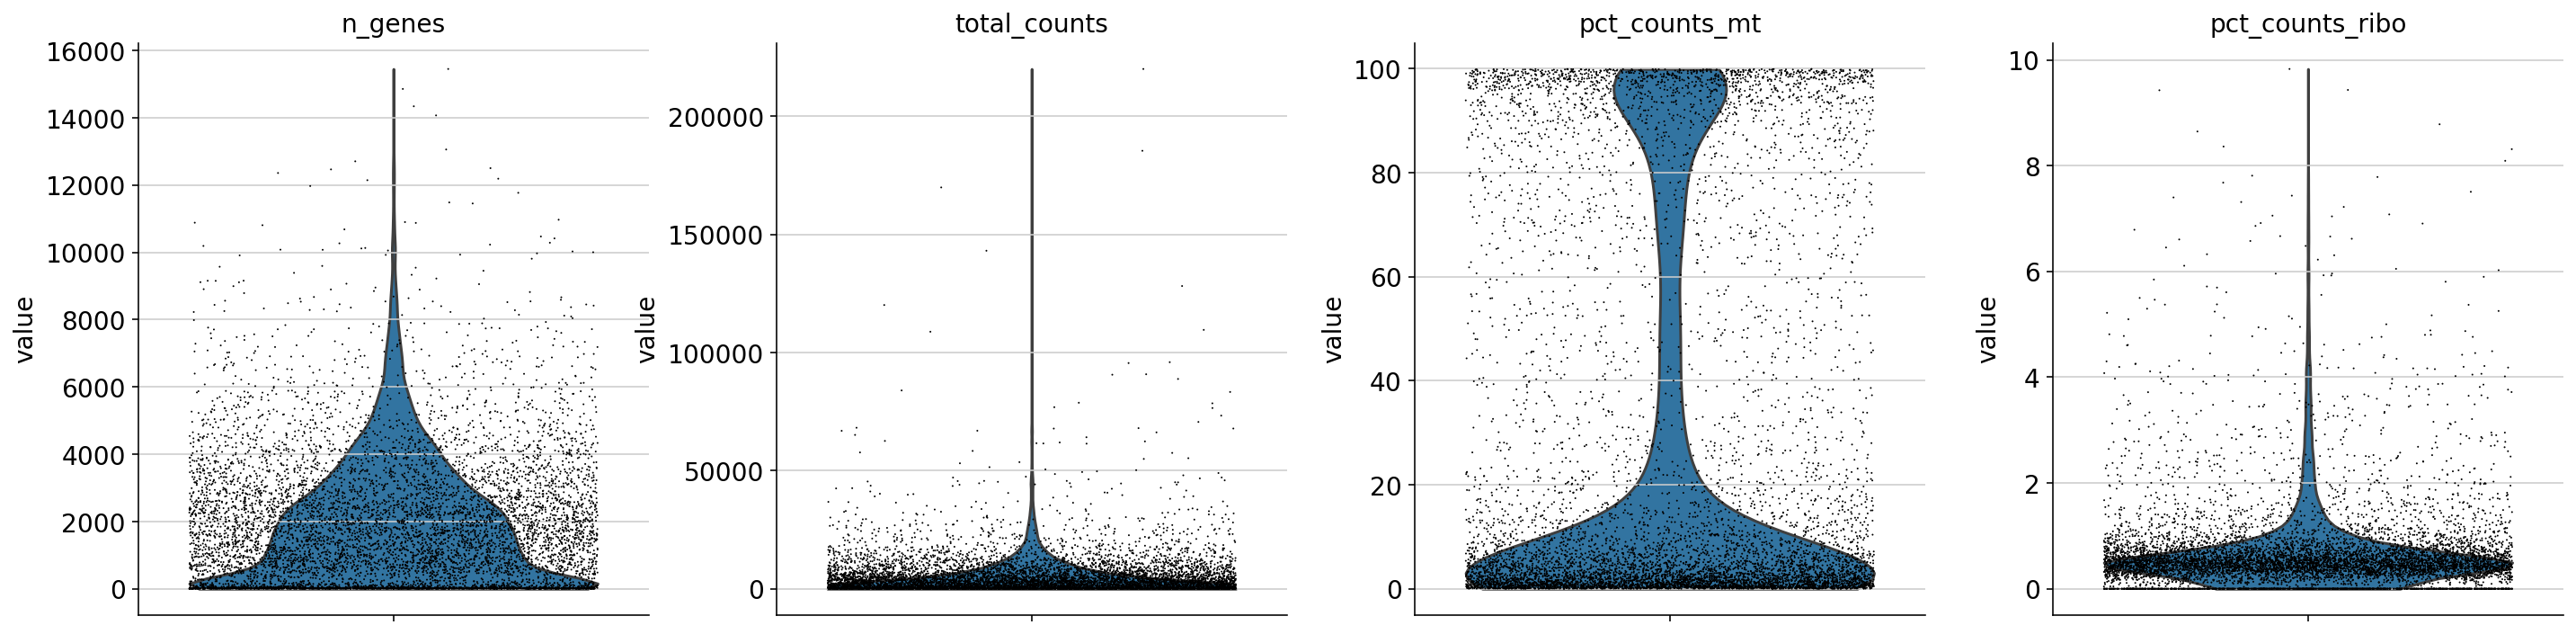

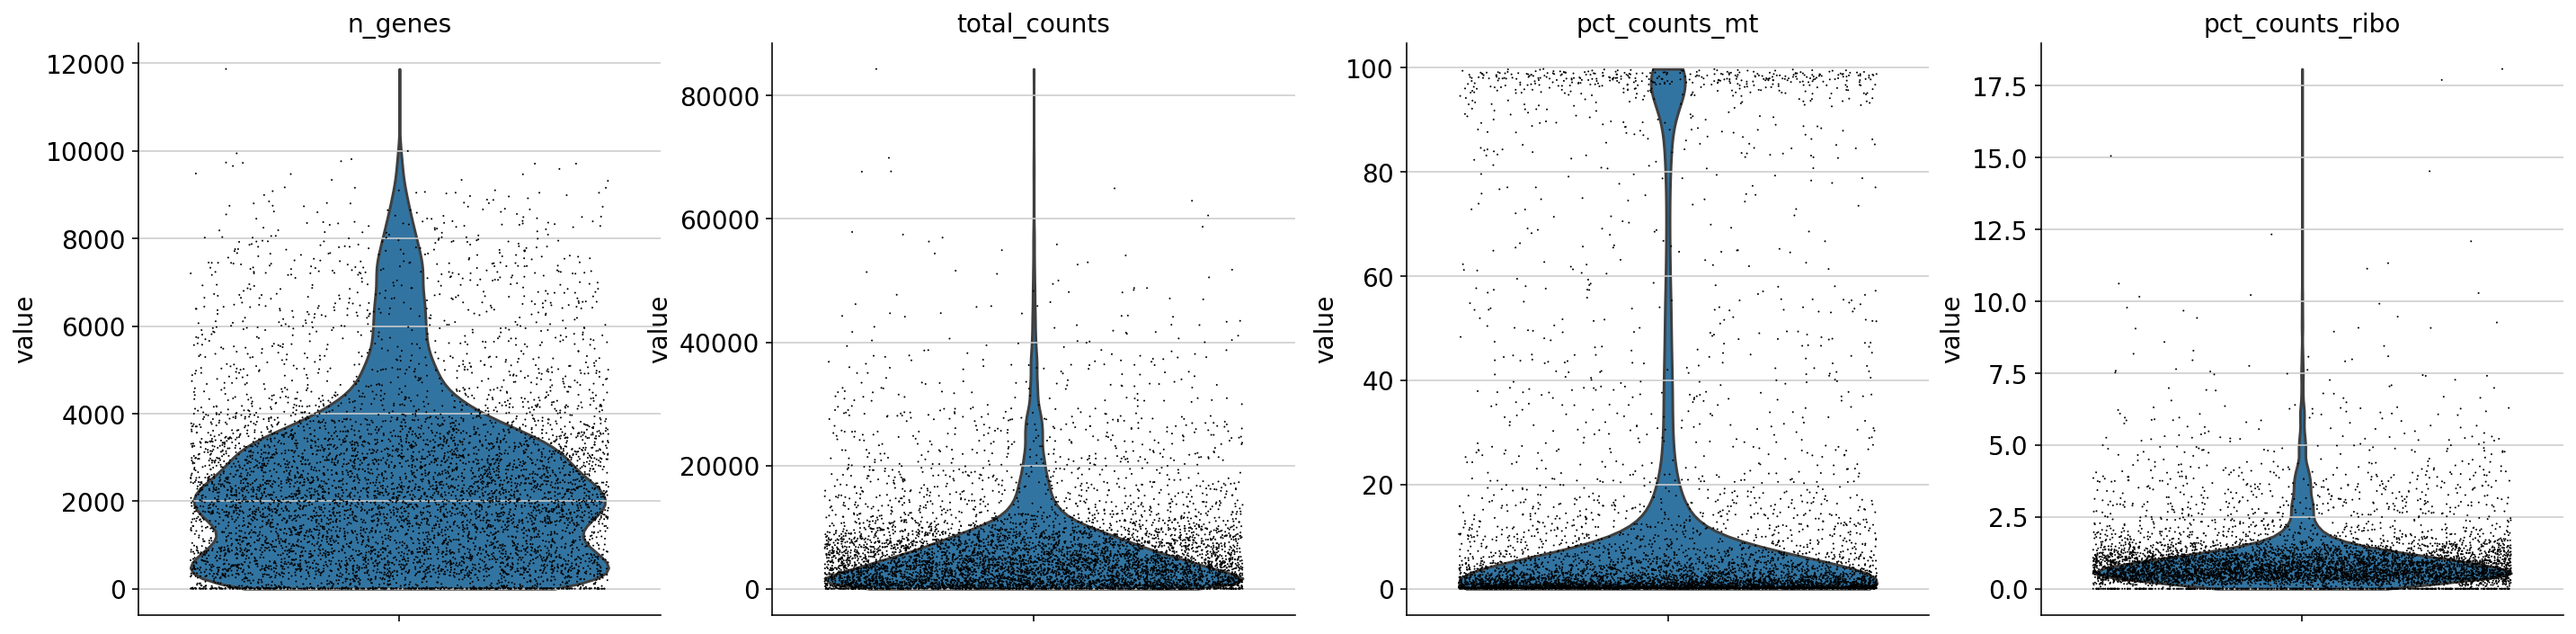

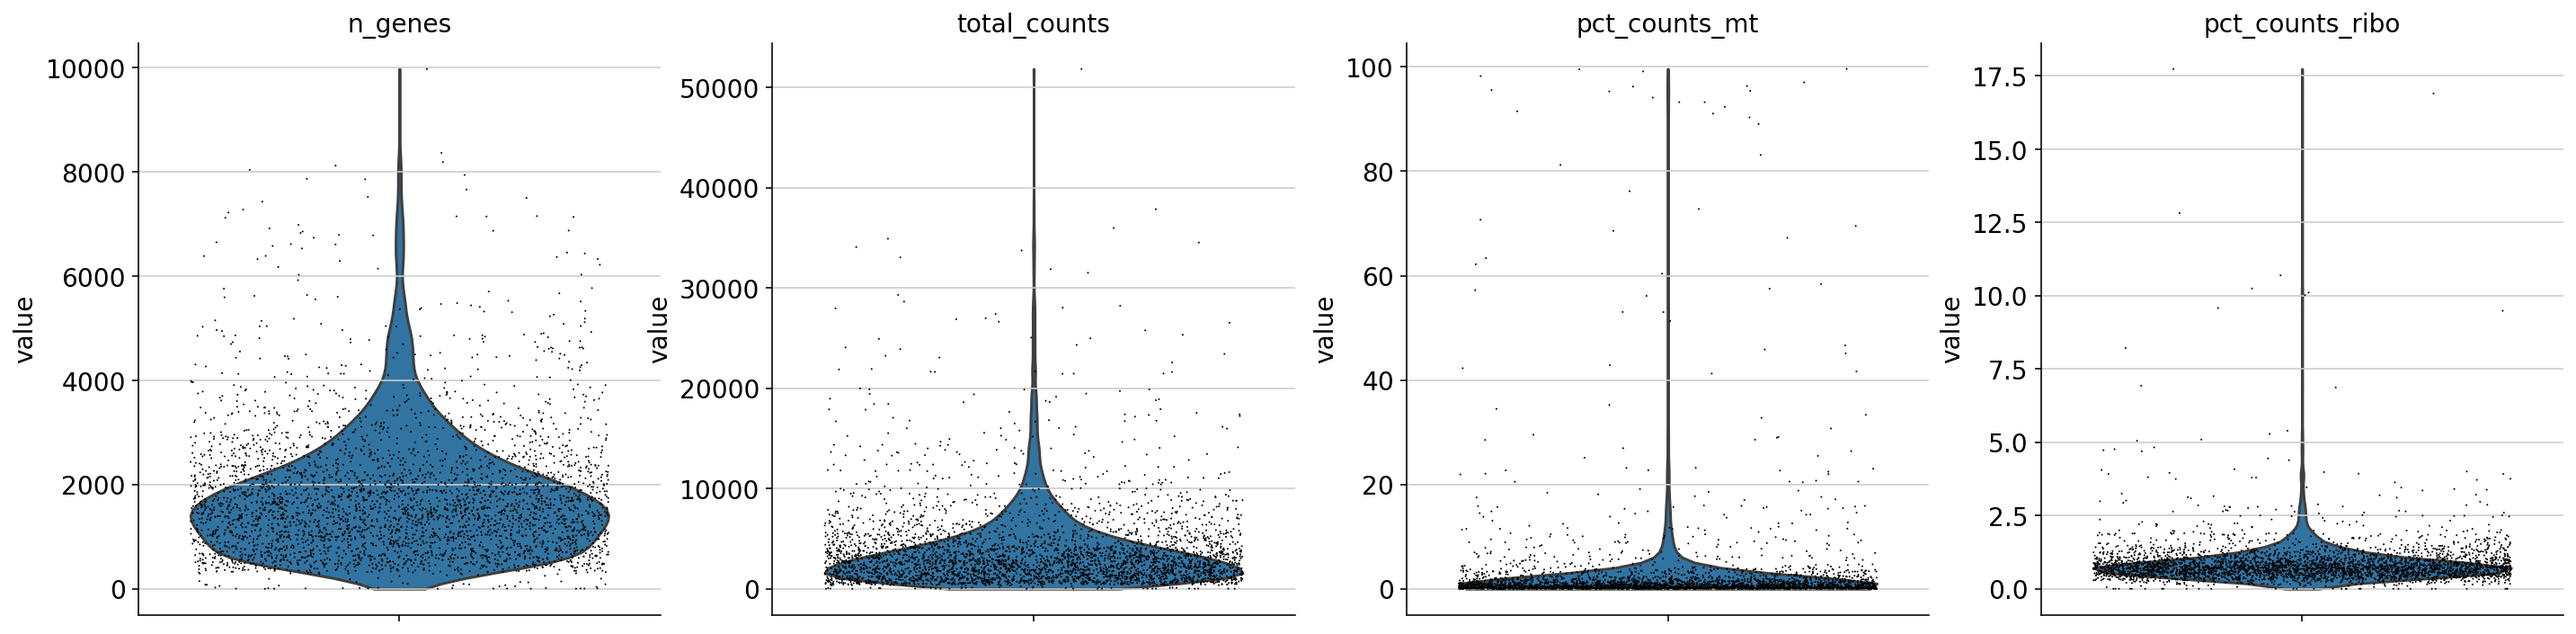

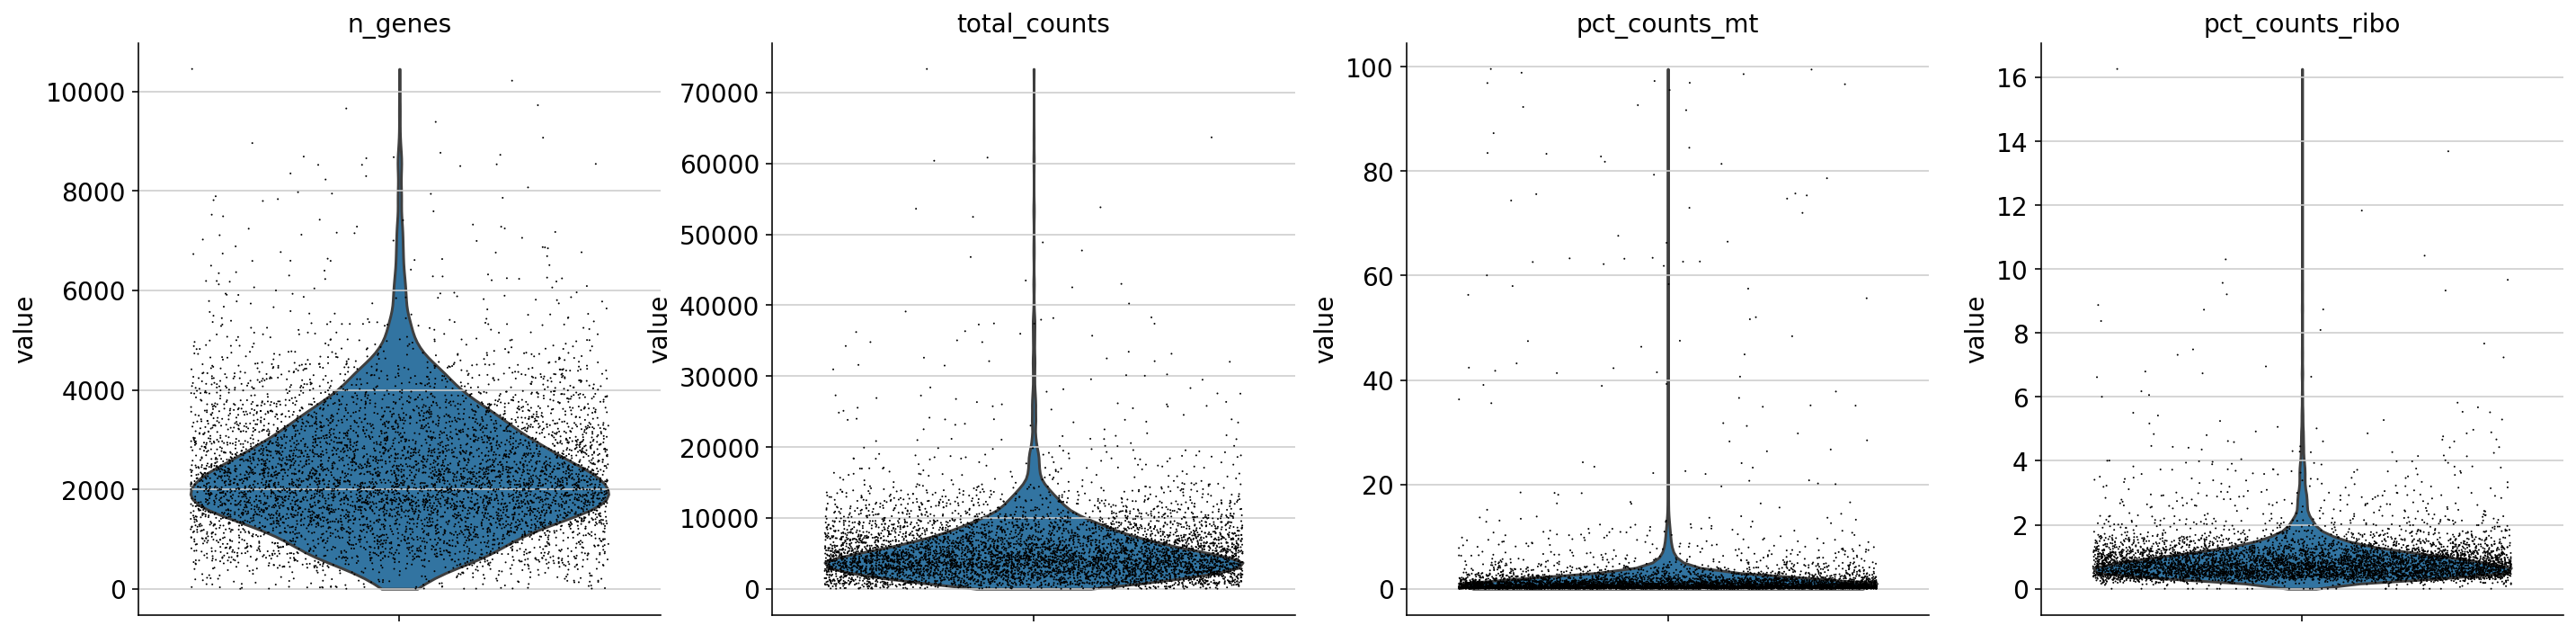

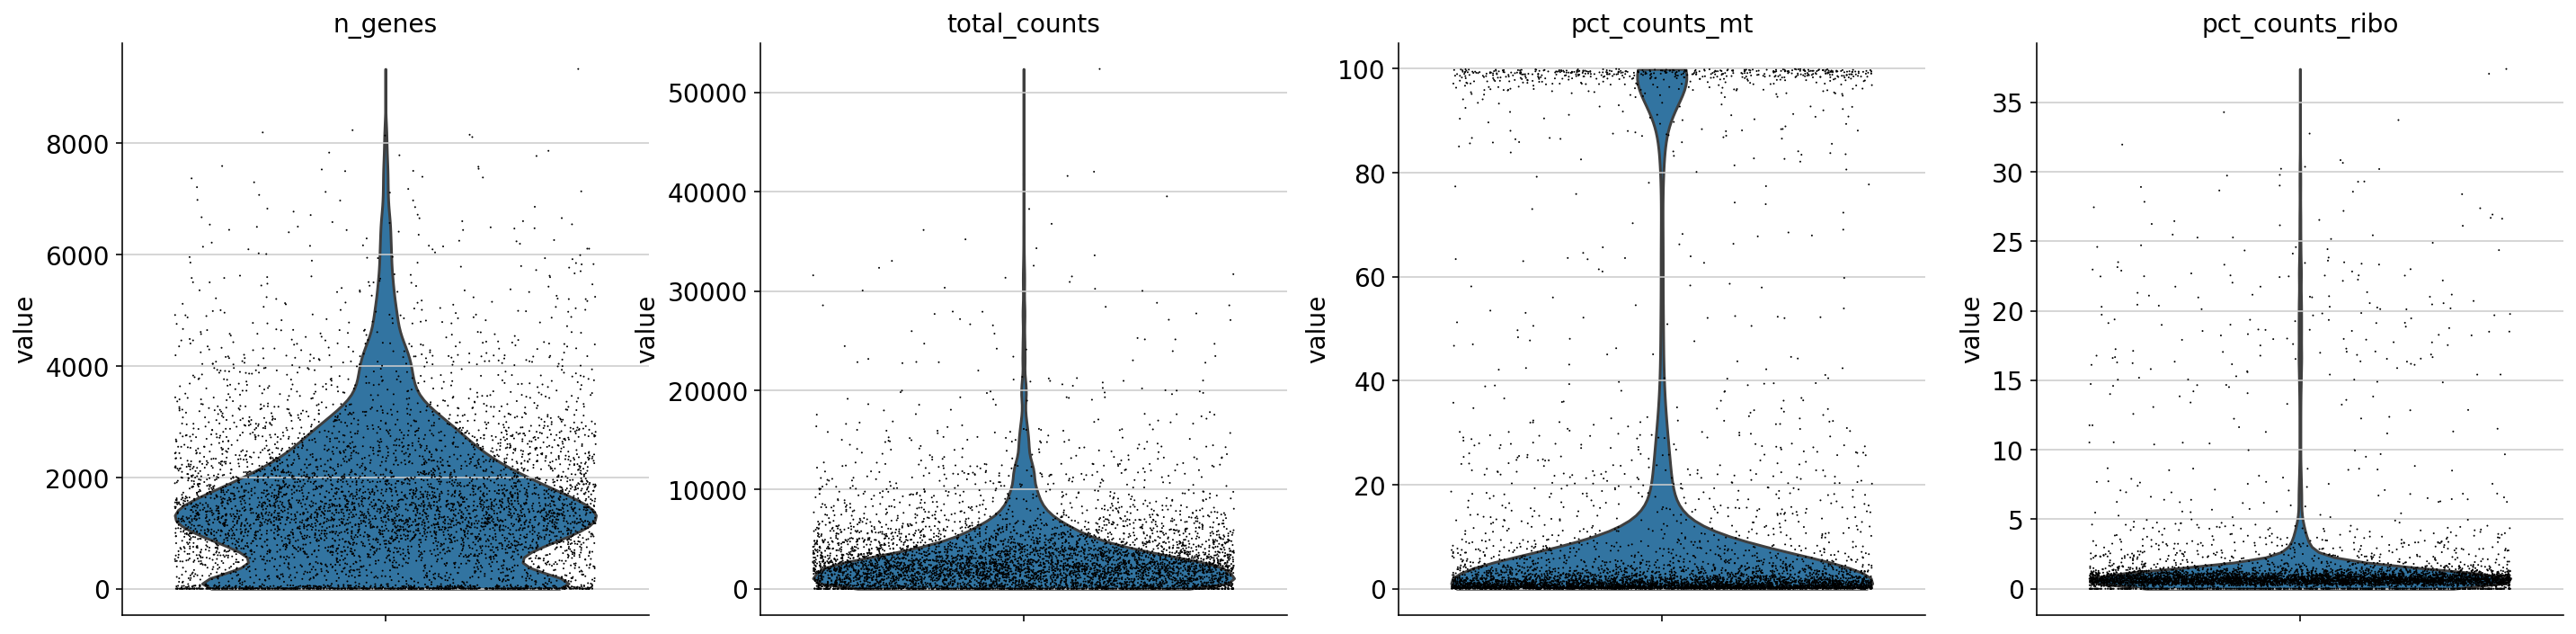

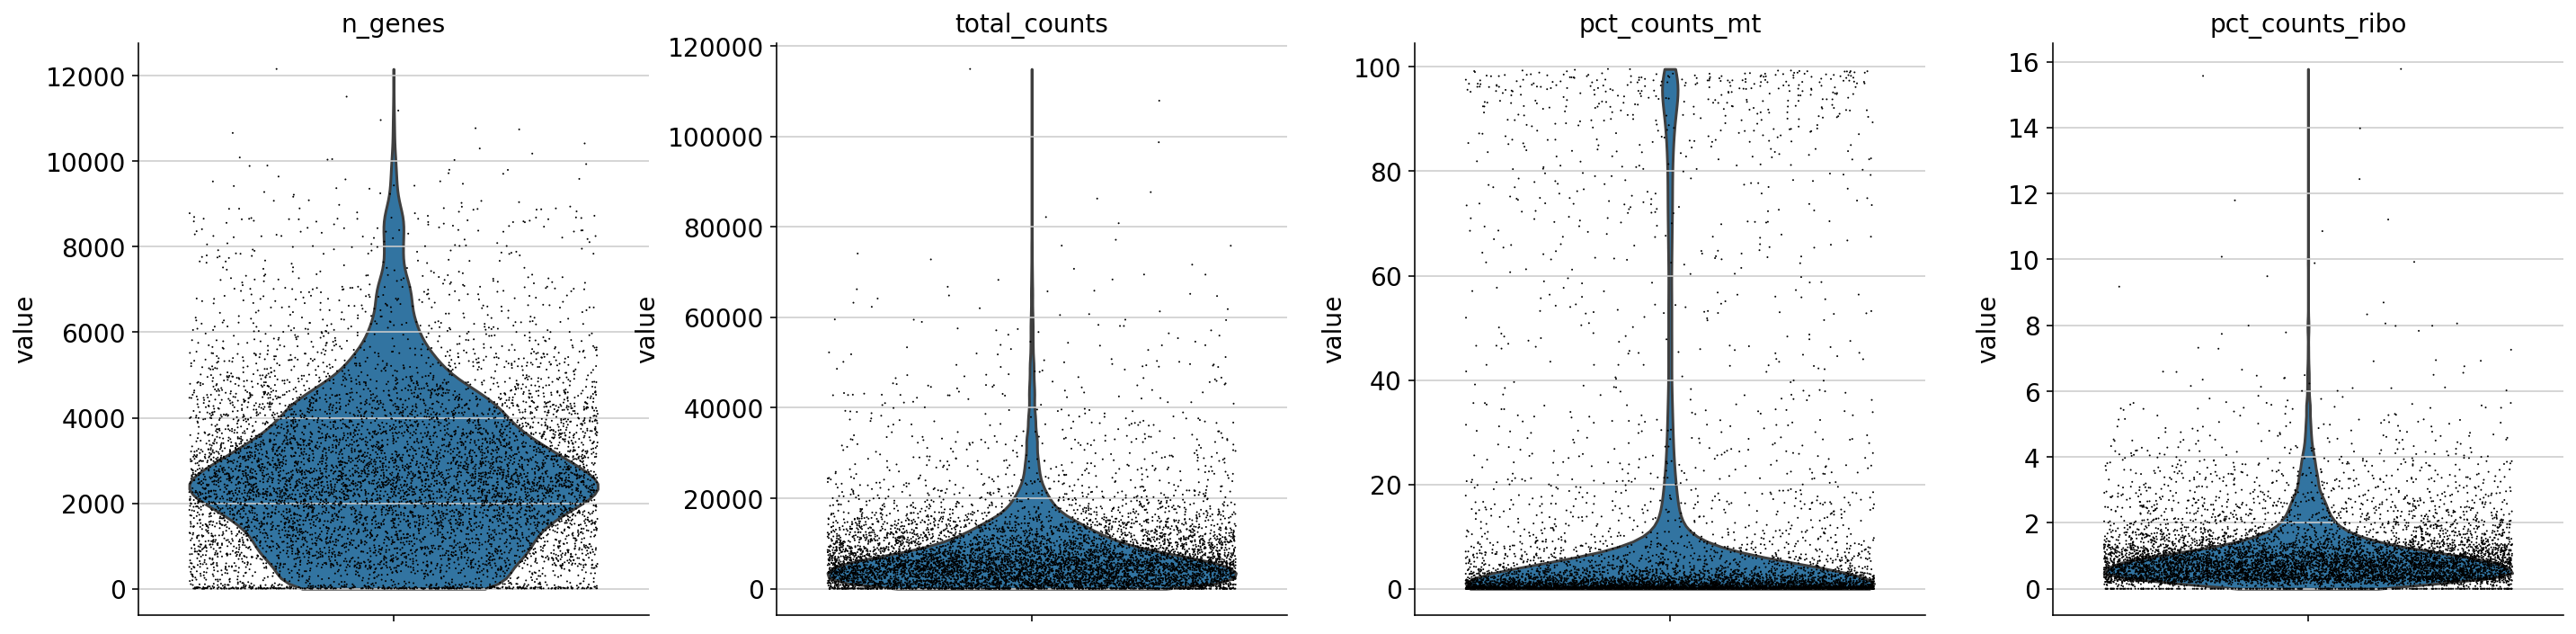

In [20]:
%matplotlib inline
for i in range(numberobj):
    sc.pl.violin(locals()[object_names[i]], ['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True,size =1)#,save= object_names[i]+"_prefilter_all.pdf")
    plt.show()

In [21]:
print("Median numbers without mitochondrial reads\n")


for i in range(numberobj):
    median_counts = np.median(locals()[object_names[i]].obs['total_counts_mito'])
    mean_counts= int(np.mean(locals()[object_names[i]].obs['total_counts_mito']))

    median_counts_mito = np.median(locals()[object_names[i]].obs['total_counts']) 
    mean_counts_mito =int(np.mean(locals()[object_names[i]].obs['total_counts']))

    median_difference = median_counts - median_counts_mito 
    mean_difference = mean_counts -  mean_counts_mito
    
    pct_median_diff = median_difference / median_counts
    pct_mean_diff = mean_difference/mean_counts
    
    print(object_names[i],'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']), '\n',
            "\tmedian reads/nuclei:",median_counts, '(',median_difference,'\t', pct_median_diff,'%',')','\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:", mean_counts, '(',mean_difference,'\t', pct_mean_diff,'%',')','\n')

Median numbers without mitochondrial reads

adata_SRR12621867 
 	median genes/nuclei: 1520.0 
 	median reads/nuclei: 2984.5 ( 393.5 	 0.13184788071703804 % ) 
 	mean genes/nuclei: 1919 
 	mean reads/nuclei: 5727 ( 507 	 0.08852802514405447 % ) 

adata_SRR12621868 
 	median genes/nuclei: 2066.0 
 	median reads/nuclei: 4099.0 ( 125.0 	 0.030495242742132226 % ) 
 	mean genes/nuclei: 2393 
 	mean reads/nuclei: 6626 ( 199 	 0.030033202535466343 % ) 

adata_SRR12621869 
 	median genes/nuclei: 1545.5 
 	median reads/nuclei: 2775.5 ( 18.5 	 0.0066654656818591245 % ) 
 	mean genes/nuclei: 1772 
 	mean reads/nuclei: 3873 ( 41 	 0.010586108959462949 % ) 

adata_SRR12621870 
 	median genes/nuclei: 2187.0 
 	median reads/nuclei: 4548.0 ( 45.0 	 0.009894459102902375 % ) 
 	mean genes/nuclei: 2367 
 	mean reads/nuclei: 5687 ( 51 	 0.008967821346931599 % ) 

adata_SRR12621871 
 	median genes/nuclei: 1365.0 
 	median reads/nuclei: 2309.0 ( 35.0 	 0.015158077089649198 % ) 
 	mean genes/nuclei: 1578 
 	m

### Save preprocessed files

In [22]:
for i in range(numberobj):
    locals()[object_names[i]].write(os.path.join('data/preprocessed_smajic_'+object_names[i][6:]+'.h5ad'))

In [23]:
!ls data/

preprocessed_altena_g004.h5ad  preprocessed_altena_g018.h5ad
preprocessed_altena_g005.h5ad  preprocessed_altena_g019.h5ad
preprocessed_altena_g011.h5ad  preprocessed_altena_g020.h5ad
preprocessed_altena_g012.h5ad  preprocessed_smajic_SRR12621867.h5ad
preprocessed_altena_g013.h5ad  preprocessed_smajic_SRR12621868.h5ad
preprocessed_altena_g014.h5ad  preprocessed_smajic_SRR12621869.h5ad
preprocessed_altena_g015.h5ad  preprocessed_smajic_SRR12621870.h5ad
preprocessed_altena_g016.h5ad  preprocessed_smajic_SRR12621871.h5ad
preprocessed_altena_g017.h5ad  preprocessed_smajic_SRR12621872.h5ad
